<a href="https://colab.research.google.com/github/roopalJazz/AIML/blob/master/M1E4_PCA_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

The objective of this experiment to understand PCA.

In [0]:
#@title Experiment Walkthrough
#@markdown PCA for IRIS
from IPython.display import HTML
HTML("""<video width='320' height='240' controls> <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_b7_hyd/experiment_details/pca.mp4" type="video/mp4"></video>""")


### Dataset

#### History

This is a multivariate dataset introduced by R.A.Fisher (Father of Modern Statistics) for showcasing linear discriminant analysis. This is arguably the best known dataset in Feature Selection literature.


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

#### Description:
The Iris dataset consists of 150 data instances. There are 3 classes (Iris Versicolor, Iris Setosa and Iris Virginica) each have 50 instances. 


For each flower we have the below data attributes 

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

To make our experiment easy we rename the classes  with numbers : 

    "0": setosa
    "1": versicolor
    "2": virginica
    

### Challenges:

When we use the data with large number of features or dimensionality, models usually choke because

    1. Training time increases exponentially with number of features.
    2. Models have increasing risk of overfitting with increasing number of features.
    
To avoid the above mentioned problems while learning about data analysis, we use simple, well behaved, data that reduces the cognitive load, and makes it easier to debug as we are able to better comprehend the data we are working with.  

Hence, this is a good dataset to work on.

### Domain Information: 

Iris Plants are flowering plants with showy flowers. They are very popular among movie directors as it gives excellent background. 

They are predominantly found in dry, semi-desert, or colder rocky mountainous areas in Europe and Asia. They have long, erect flowering stems and can produce white, yellow, orange, pink, purple, lavender, blue or brown colored flowers. There are 260 to 300 types of iris.

![alt text](https://cdn-images-1.medium.com/max/1275/1*7bnLKsChXq94QjtAiRn40w.png)

As you could see, flowers have 3 sepals and 3 petals.  The sepals are usually spreading or drop downwards and the petals stand upright, partly behind the sepal bases. However, the length and width of the sepals and petals vary for each type.


### Setup Steps

#### Importing the required packages

In [0]:
from sklearn import datasets
from sklearn import model_selection

In [0]:
from sklearn.decomposition import PCA

In [0]:
from sklearn import linear_model

Loading iris data from sklearn

In [0]:
data=datasets.load_iris()

Storing the data in a variable

In [0]:
dataArr=data.data

In [0]:
type(dataArr)

numpy.ndarray

Let us try to check the type of the data

In [0]:
type(data)

sklearn.utils.Bunch

Let us see what are features present in the dataset

In [0]:
data.feature_names

In [0]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Splitting the data into train and test  sets

In [0]:
trainData,testData,labelTrain,labelTest=model_selection.train_test_split(dataArr,data.target)

Now let us see what is the shape of the training and testing sets

In [0]:
trainData.shape,testData.shape, dataArr.shape

((112, 4), (38, 4), (150, 4))

Now, let us try to reduce the dimenssion of data from 4D to 3D using PCA

In [0]:
pca=PCA(n_components=3)

In [0]:
dataReduced=pca.fit_transform(dataArr)

In [0]:
type(dataReduced)

numpy.ndarray

#### Plotting the data after its dimensions are reduced

In [0]:
# Plotting the data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



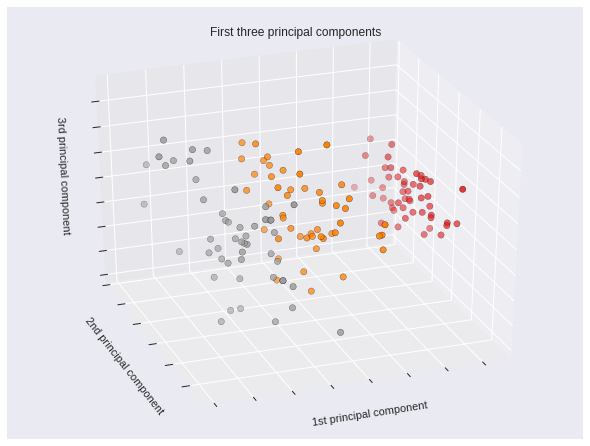

In [0]:
fig= plt.figure(1,figsize=(8,6))
axes=Axes3D(fig, elev=-150, azim=110)
axes.scatter(dataReduced[:, 0], dataReduced[:, 1], dataReduced[:, 2], c=data.target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
axes.set_title("First three principal components")
axes.set_xlabel('1st principal component')
axes.set_ylabel('2nd principal component')
axes.set_zlabel('3rd principal component')
axes.set_xticklabels([])
axes.set_yticklabels([])
axes.set_zticklabels([])

plt.show()

Now let us try to train various models using the data after its dimensions are reduced

In [0]:
trainDataRed,testDataRed=model_selection.train_test_split(dataReduced)

#### Applying Linear classifier on the original data

In [0]:
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(trainData,labelTrain)
clf.score(testData,labelTest)

0.9736842105263158

#### Applying Linear classifier on the reduced data

In [0]:
clfPCA = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clfPCA.fit(trainDataRed,labelTrain)
clfPCA.score(testDataRed,labelTest)

0.34210526315789475

#### Applying KNN on the original data

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(trainData,labelTrain)
clf2.score(testData,labelTest)

0.9210526315789473

#### Applying KNN on reduced data

In [0]:
clf2PCA = KNeighborsClassifier(n_neighbors=3)
clf2PCA.fit(trainDataRed,labelTrain)
clf2PCA.score(testDataRed,labelTest)

0.34210526315789475